<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/k_means__cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
iris = pd.read_csv("/content/IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [7]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris_outcome = pd .crosstab(index=iris["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

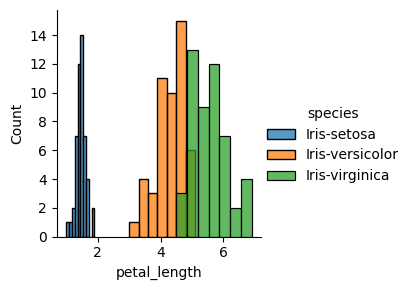

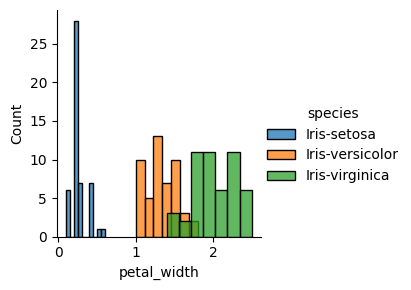

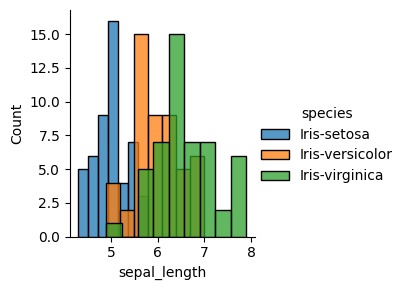

In [12]:
sns.FacetGrid(iris,hue="species",height=3, aspect=1).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3, aspect=1).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3, aspect=1).map(sns.histplot,"sepal_length").add_legend()
plt.show()

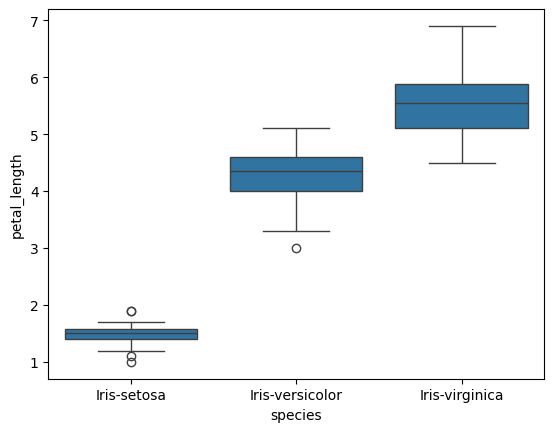

In [13]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


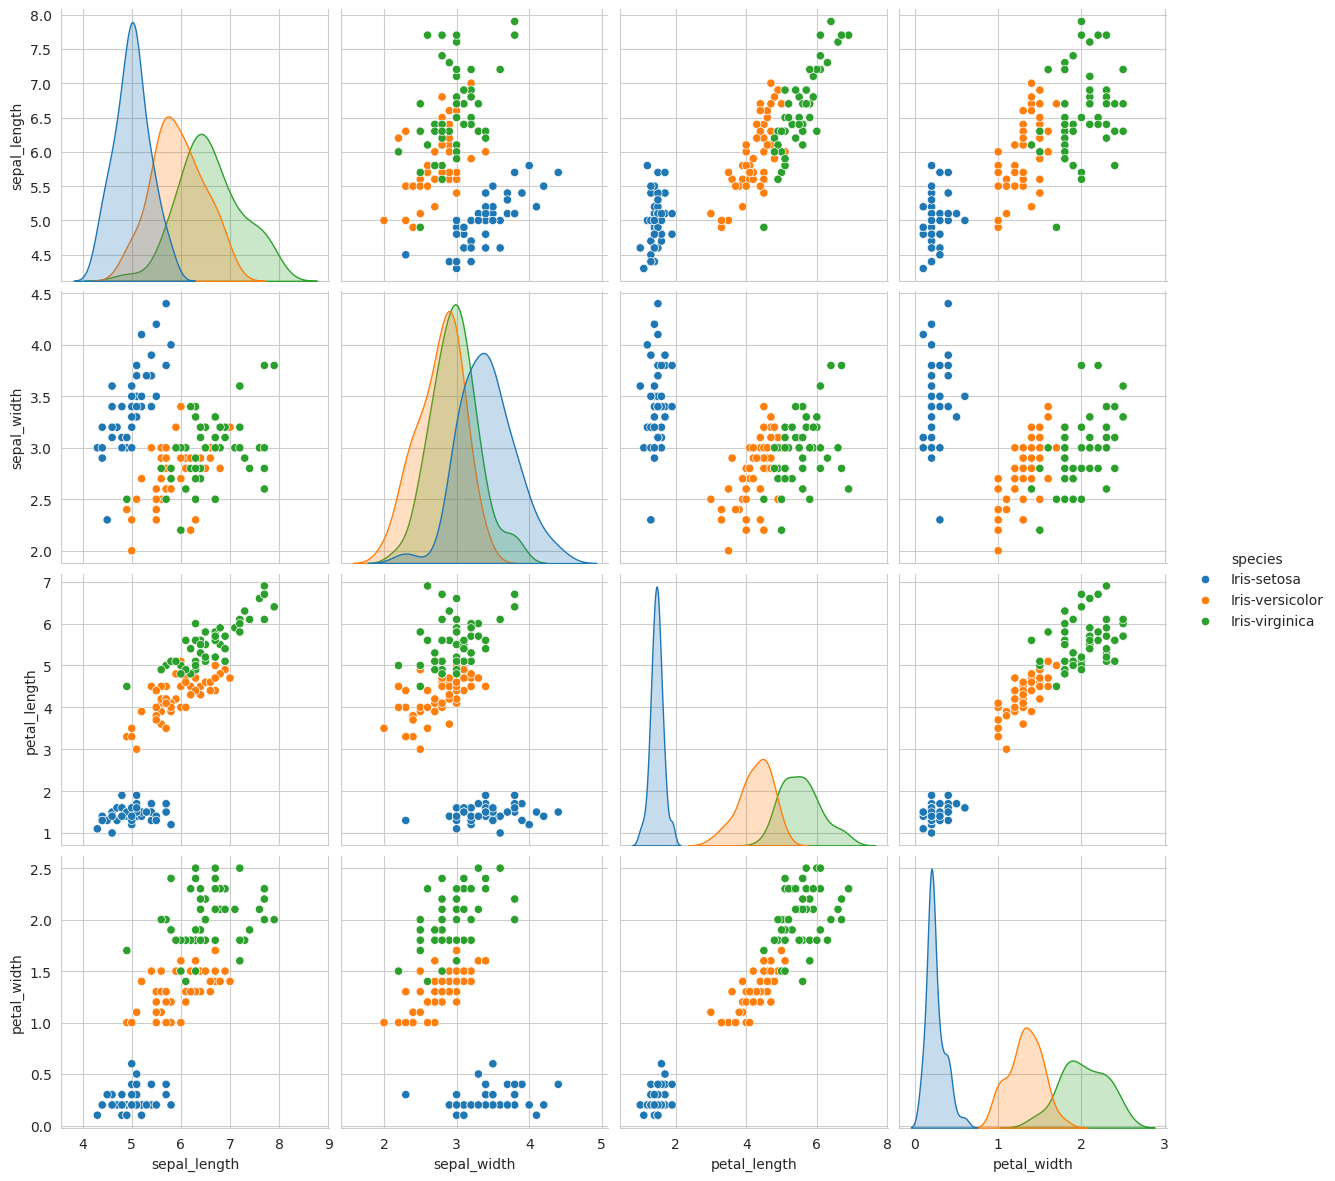

In [14]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans (n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

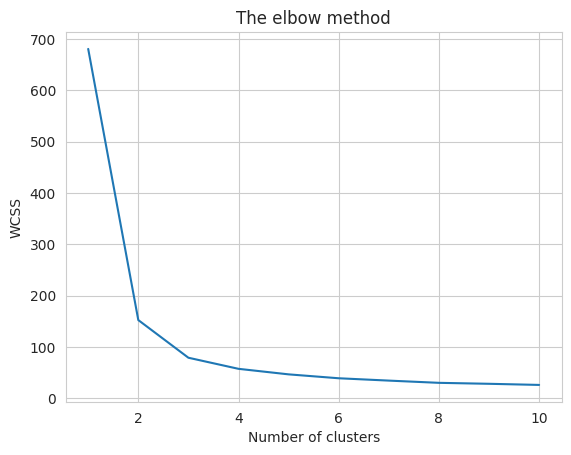

In [17]:
# determine the optimal num of k-means
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans ( n_clusters = 3 , init='k-means++'  , max_iter = 300  , n_init=10 , random_state=42)
y_kmeans = kmeans.fit_predict(x)

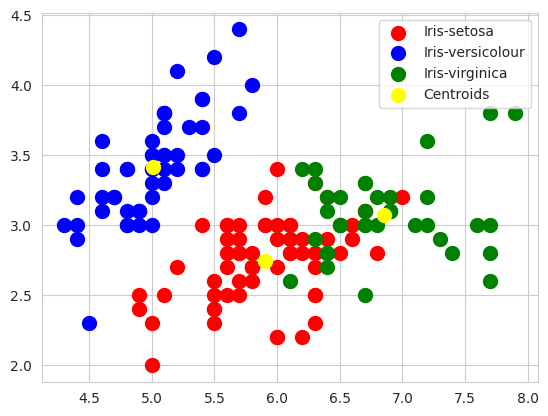

In [21]:
plt. scatter ( x [ y_kmeans == 0 , 0 ] , x [ y_kmeans == 0 , 1 ] , s = 100 , c = 'red' , label = 'Iris-setosa' )
plt. scatter ( x [ y_kmeans == 1 , 0 ] , x [ y_kmeans == 1 , 1 ] , s = 100 , c = 'blue' , label = 'Iris-versicolour' )
plt .scatter ( x [ y_kmeans == 2 , 0 ] , x [ y_kmeans == 2 , 1 ] , s = 100 , c = 'green' , label = 'Iris-virginica' )



plt.scatter ( kmeans.cluster_centers_ [ : , 0 ] , kmeans.cluster_centers_ [ : , 1 ] , s = 100 , c = 'yellow' , label = 'Centroids' )
plt.legend ()

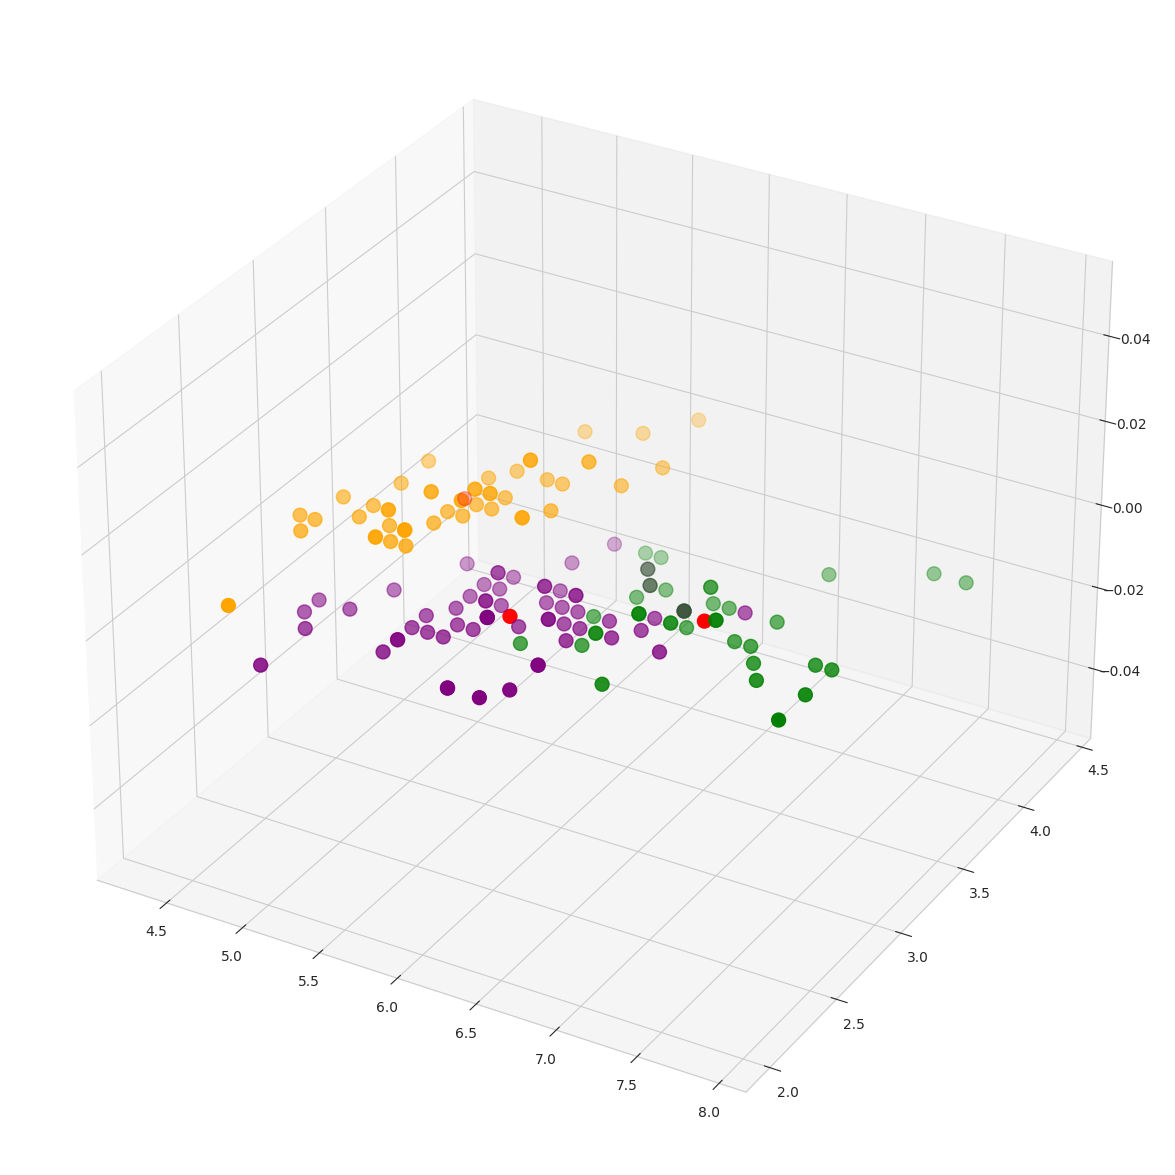

In [22]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()